# Importing libraries

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
from fastai import *
from fastai.vision import *
import pathlib

# Looking at the data

Using this dataset https://www.kaggle.com/moltean/fruits/home

In [3]:
print(pathlib.Path.cwd())

/home/nbuser/courses/fast-ai/course-v3/nbs/dl1


In [4]:
path = pathlib.Path('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360')
path 

PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360')

In [5]:
path.ls()

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/papers'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/Training'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/LICENSE'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/test-multiple_fruits'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/readme.md'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/models'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/Test')]

In [27]:
sz = 224
bs = 32
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train='Training', valid='Test', ds_tfms=tfms, size=sz, bs=bs
                                 ).normalize(imagenet_stats)

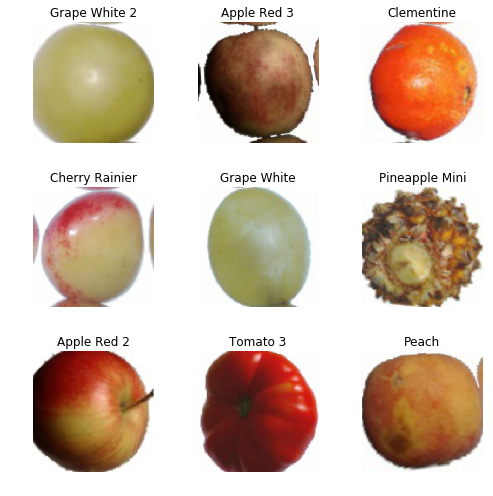

In [28]:
data.show_batch(3, figsize=(7,7))

In [30]:
print(data.classes)
len(data.classes), data.c

['Physalis', 'Apple Golden 3', 'Apple Golden 1', 'Pitahaya Red', 'Banana', 'Avocado', 'Lemon Meyer', 'Strawberry', 'Pineapple', 'Apple Red 3', 'Pear', 'Kaki', 'Peach Flat', 'Apple Golden 2', 'Grape Pink', 'Apple Granny Smith', 'Pineapple Mini', 'Pear Monster', 'Melon Piel de Sapo', 'Strawberry Wedge', 'Avocado ripe', 'Maracuja', 'Orange', 'Granadilla', 'Mandarine', 'Nectarine', 'Cherry Wax Yellow', 'Carambula', 'Walnut', 'Cherry 2', 'Tomato Cherry Red', 'Tomato 4', 'Pear Abate', 'Rambutan', 'Passion Fruit', 'Salak', 'Cherry 1', 'Tomato 2', 'Tamarillo', 'Pomegranate', 'Cherry Rainier', 'Apricot', 'Plum', 'Limes', 'Apple Red Yellow', 'Cherry Wax Black', 'Cantaloupe 1', 'Pear Williams', 'Apple Braeburn', 'Tomato 1', 'Tomato Maroon', 'Banana Red', 'Peach', 'Tangelo', 'Papaya', 'Mango', 'Apple Red Delicious', 'Raspberry', 'Pepino', 'Physalis with Husk', 'Apple Red 2', 'Grape White 2', 'Dates', 'Huckleberry', 'Guava', 'Tomato 3', 'Grapefruit White', 'Grapefruit Pink', 'Mulberry', 'Cantaloupe

(81, 81)

# Traininig: resnet34

In [36]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [37]:
learn.fit_one_cycle(4)

Total time: 24:45
epoch  train_loss  valid_loss  error_rate
1      0.071633    0.066682    0.018376    (06:12)
2      0.041145    0.069666    0.012395    (06:10)
3      0.018691    0.028298    0.011170    (06:11)
4      0.019526    0.025281    0.010593    (06:10)



In [38]:
learn.save('stage-1', return_path=1)

PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/models/stage-1.pth')

# Results

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

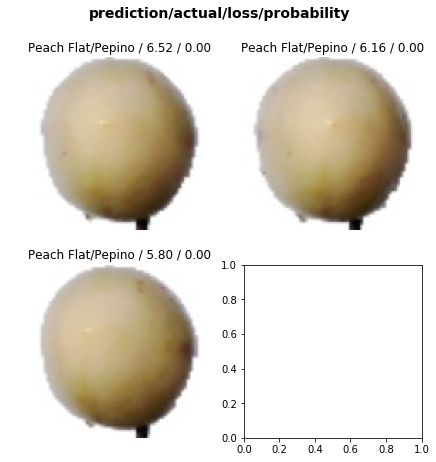

In [41]:
interp.plot_top_losses(3, figsize=(7,7))

In [43]:
#interp.plot_confusion_matrix(figsize=(12,12), dpi=70)

In [47]:
interp.most_confused(min_val=2)

[('Cherry 1', 'Cherry 2', 62),
 ('Cherry 2', 'Cherry 1', 47),
 ('Pepino', 'Peach Flat', 23),
 ('Apple Red 2', 'Apple Braeburn', 14)]

# Unfreezing, fine-tuning and learning rates

In [48]:
learn.unfreeze()

In [49]:
learn.fit_one_cycle(1)

Total time: 08:33
epoch  train_loss  valid_loss  error_rate
1      0.024691    0.024330    0.009872    (08:33)



In [69]:
learn.load('stage-1')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (41322 items)
['Physalis' 'Physalis' 'Physalis' 'Physalis' ... 'Kumquats' 'Kumquats' 'Kumquats' 'Kumquats']
Path: .
x: ImageItemList (41322 items)
[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/Training/Physalis/178_100.jpg')
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/Training/Physalis/291_100.jpg')
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/Training/Physalis/97_100.jpg')
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/Training/Physalis/r_122_100.jpg') ...
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/Training/Kumquats/248_100.jpg')
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/Training/Kumquats/179_100.jpg')
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360/Training/Kumquats/114_100.jpg')
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruit

In [86]:
learn.lr_find(start_lr=1e-09)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


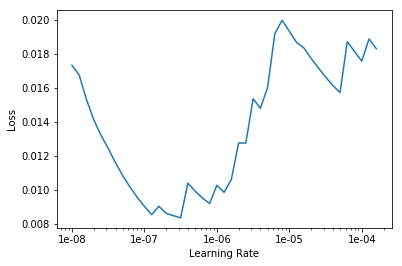

In [87]:
learn.recorder.plot()

In [90]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-8,1e-6))

Total time: 17:09
epoch  train_loss  valid_loss  error_rate
1      0.009917    0.043837    0.014412    (08:34)
2      0.009036    0.041644    0.014052    (08:34)



# Training: resnet50

In [6]:
sz = 229
bs = 64
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train='Training', valid='Test', ds_tfms=tfms, size=sz, bs=bs
                                 ).normalize(imagenet_stats)

In [7]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [13]:
learn.fit_one_cycle(8)

Total time: 1:50:46
epoch  train_loss  valid_loss  error_rate
1      0.053926    0.040316    0.013476    (14:07)
2      0.033392    0.035229    0.010161    (13:48)
3      0.033201    0.025114    0.010953    (13:48)
4      0.021624    0.025876    0.010377    (13:48)
5      0.012275    0.019638    0.009368    (13:48)
6      0.009063    0.025302    0.008575    (13:49)
7      0.009075    0.025527    0.007999    (13:48)
8      0.006934    0.025411    0.007783    (13:48)



In [14]:
learn.save('stage-1-50')

In [15]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-8,1e-6))

Total time: 54:29
epoch  train_loss  valid_loss  error_rate
1      0.007374    0.025891    0.007783    (18:10)
2      0.007321    0.026076    0.007783    (18:14)
3      0.006373    0.025213    0.007855    (18:05)



In [8]:
learn.save('stage-2-50')

This is overfitting? 

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

In [10]:
interp.most_confused(min_val=2)

[('Tomato 1', 'Cherry 1', 220),
 ('Strawberry Wedge', 'Avocado', 185),
 ('Melon Piel de Sapo', 'Cherry 1', 184),
 ('Tomato 2', 'Cherry 1', 170),
 ('Apple Golden 3', 'Cherry 1', 161),
 ('Pear', 'Cherry 1', 159),
 ('Apple Golden 2', 'Cherry 1', 159),
 ('Orange', 'Cherry 1', 158),
 ('Tamarillo', 'Cherry 1', 156),
 ('Pitahaya Red', 'Cherry 1', 153),
 ('Cherry Wax Yellow', 'Mango', 152),
 ('Pineapple Mini', 'Cherry 1', 151),
 ('Tangelo', 'Cherry 1', 150),
 ('Pear Monster', 'Cherry 1', 149),
 ('Lemon Meyer', 'Cherry 1', 148),
 ('Peach', 'Cherry 1', 147),
 ('Pear Williams', 'Cherry 1', 146),
 ('Apple Red 2', 'Cherry 1', 144),
 ('Apple Red Yellow', 'Cherry 1', 143),
 ('Tomato 3', 'Cherry 1', 143),
 ('Apple Red 1', 'Cherry 1', 143),
 ('Avocado', 'Cherry 1', 142),
 ('Nectarine', 'Cherry 1', 139),
 ('Grapefruit White', 'Cherry 1', 139),
 ('Apple Red 3', 'Cherry 1', 135),
 ('Cherry Rainier', 'Cherry 1', 129),
 ('Grape Pink', 'Cherry 1', 128),
 ('Mango', 'Cherry 1', 128),
 ('Clementine', 'Cherry 1'

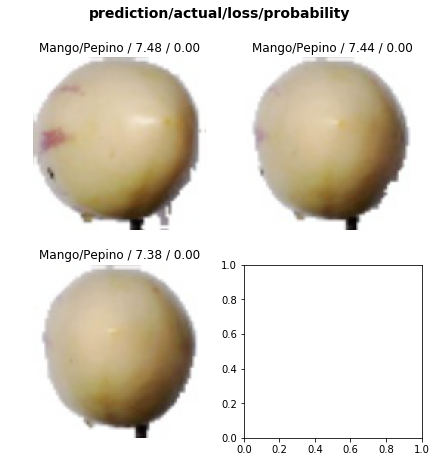

In [11]:
interp.plot_top_losses(3, figsize=(7,7))

# Single image prediction

In [15]:
import fastai
fastai.defaults.device = torch.device('cpu')

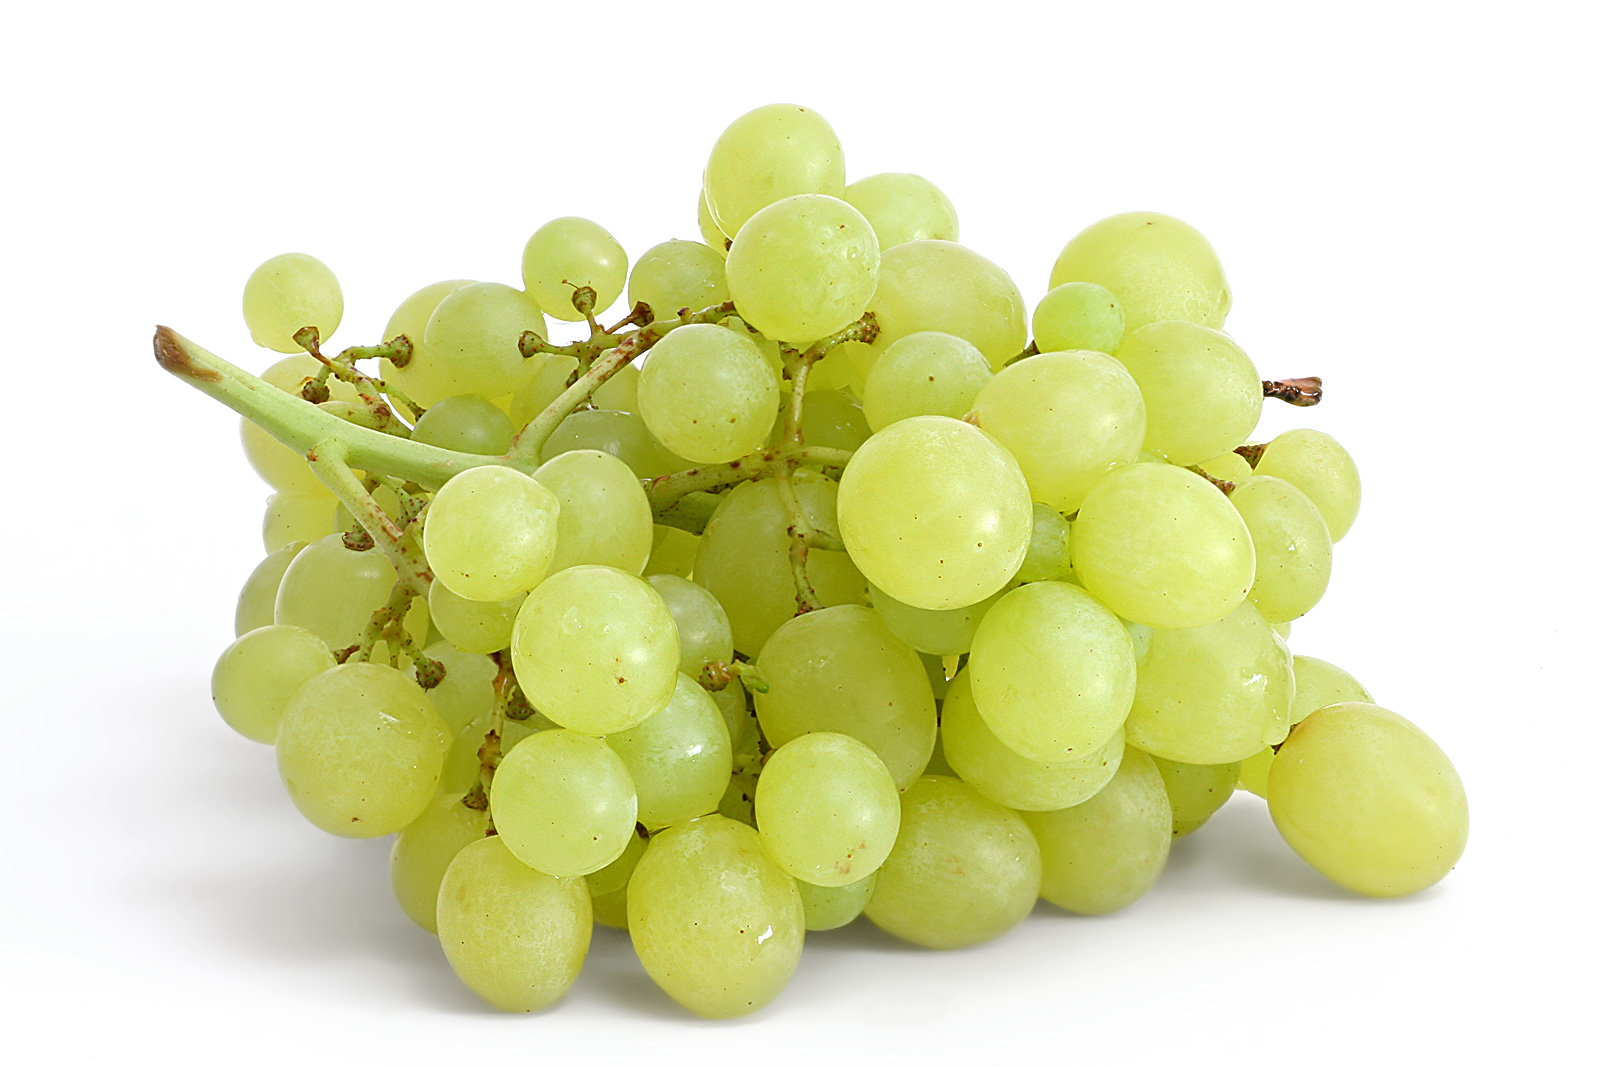

In [80]:
filename = '/home/nbuser/courses/fast-ai/course-v3/nbs/data/single_img_pred/white_grapes.jpg'
img = open_image(filename)
img

In [47]:
#data.classes
path

PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/fruits-360')

In [48]:
classes = data.classes

In [69]:
data2 = ImageDataBunch.single_from_classes(path, classes, train='Training', valid='Test', tfms=get_transforms(), size=229).normalize(imagenet_stats)

In [76]:
learn = create_cnn(data2, models.resnet50).load('stage-1-50')

In [81]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'Quince'

LOS TI JE MODEL. IZGLEDA DA SU JE LOS DATSET, POGLDAJ white_grapes DIRECTORY.